
# UNHCR Forcibly Displaced Populations Capstone Project

## Naive Bayes - Multinomial

---


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import GridSearchCV
from pactools.grid_search import GridSearchCVProgressBar
from sklearn.metrics import  plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn import preprocessing
import scikitplot as skplt
from sklearn.naive_bayes import MultinomialNB
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('/Users/dayosangowawa/Desktop/GA/DSI20-lessons/projects/project-capstone/My Capstone/Forcibly displaced persons - Capstone Dayo Sangowawa/cleaned_unhcrdf_final.csv')
df.head()

,Unnamed: 0,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [11]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [12]:
df.head()

,country_of_origin,country_of_asylum,population_type,urban_or_rural_location,accommodation_type,female_aged_0-4 years,female_aged_5-11 years,female_aged_12-17 years,female_aged_18-59 years,female_aged_over_60_years,male_aged_0-4_years,male_aged_5-11_years,male_aged_12-17 years,male_aged_18-59_years,male_aged_over_60_years
0,Colombia,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,5,0
1,Cuba,Aruba,ASY,Urban,I,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Afghanistan,IDP,Rural,I,0,14,16,37,0,0,15,17,38,5
3,Afghanistan,Afghanistan,IDP,Urban,Q,74,810,853,2004,140,75,840,921,2278,206
4,Afghanistan,Afghanistan,IDP,Urban,Q,12,130,138,321,21,12,135,147,365,33


In [13]:
y = df.pop('accommodation_type')
X = pd.get_dummies(df, drop_first=True)

In [14]:
print('Baseline prediction: ', y.value_counts(normalize=True).max())

Baseline prediction:  0.8497186815375424


In [15]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y)

In [16]:
y
#'0 'if it is 'I 'and '1' if it is 'other'. 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [17]:
y = y.ravel()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1)

In [21]:
clf = MultinomialNB()

In [22]:
clf.fit(X_train, y_train)

MultinomialNB()

### GridSearch

In [42]:
params = {'alpha': range(1, 5)}

In [43]:
clf_gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)

In [44]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), param_grid={'alpha': range(1, 5)})

In [45]:
clf_gs.best_params_

{'alpha': 1}

### Using the best parameters from the Grid Search 

In [46]:
clf = MultinomialNB(alpha = 1)

In [47]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1)

In [23]:
print('Accuracy score - train set: ', clf.score(X_train, y_train))
print('Accuracy score - test set: ', clf.score(X_test, y_test))
print('Mean CV Score - train set: ', cross_val_score(clf, X_train, y_train, cv=5).mean())

Accuracy score - train set:  0.8634623762992469
Accuracy score - test set:  0.863579785909883
Mean CV Score - train set:  0.8631511453415663


### Evaluation

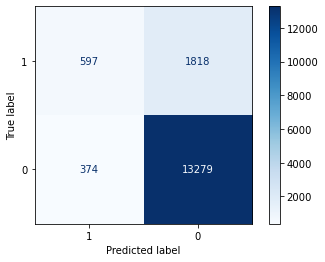

In [26]:
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', labels=[1, 0], values_format='.0f')
plt.show()

In [27]:
y_test_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     13653
           1       0.61      0.25      0.35      2415

    accuracy                           0.86     16068
   macro avg       0.75      0.61      0.64     16068
weighted avg       0.84      0.86      0.84     16068



In [29]:
probabilities_train = clf.predict_proba(X_train)

In [30]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(clf.classes_)))

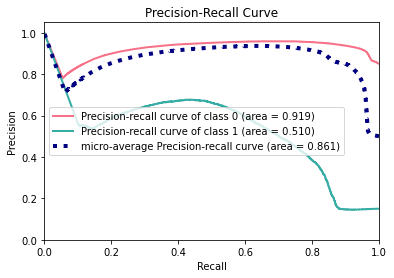

In [31]:
skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap)
plt.show()

In [32]:
print('Average precision score: ', average_precision_score(y_train, probabilities_train[:, 1]))

Average precision score:  0.5097466354784073


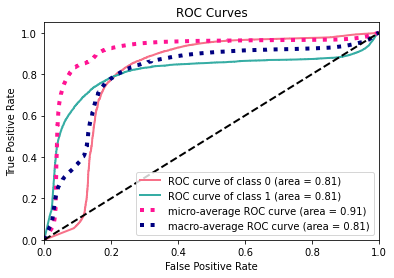

In [33]:
skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap)
plt.savefig('roc_naive_bayes.png', dpi=300, bbox_inches = "tight")
plt.show()

In [34]:
print('Area under the curve : ', roc_auc_score(y_train, probabilities_train[:, 1]))

Area under the curve :  0.8062707544364074
